In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate
from scipy.integrate import odeint # integrate ODEs

In [2]:
def dxdt(x, t, kappa, beta):
    x1, x2 = x
    dx1dt = x2
    dx2dt = - kappa * x1 - beta * x2
    return dx1dt, dx2dt

In [3]:
kappa = 10
beta = 1
x0 = 1, 0

t = np.linspace(0, 10, 101)

In [4]:
x1, x2 = odeint(dxdt, x0, t, args=(kappa, beta)).T

In [5]:
possible_kappas = np.linspace(1, 10, 501)
possible_betas = np.linspace(0, 1, 501)

In [6]:
x1s = []
act_kappas = []
act_betas = []

for config in np.arange(0, 20000):
    kappa = np.random.choice(possible_kappas)
    beta = np.random.choice(possible_betas)
    x1, x2 = odeint(dxdt, x0, t, args=(kappa, beta)).T
    x1s.append(x1)
    act_kappas.append(kappa)
    act_betas.append(beta)
    
x1s = np.array(x1s)
act_kappas = np.array(act_kappas)
act_betas = np.array(act_betas)

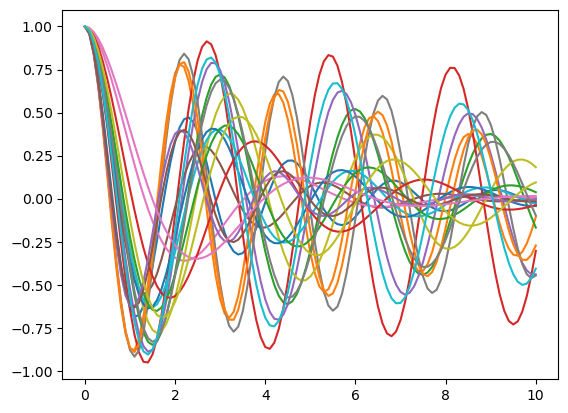

In [8]:
plt.plot(t, x1s[0:20].T)
plt.show()

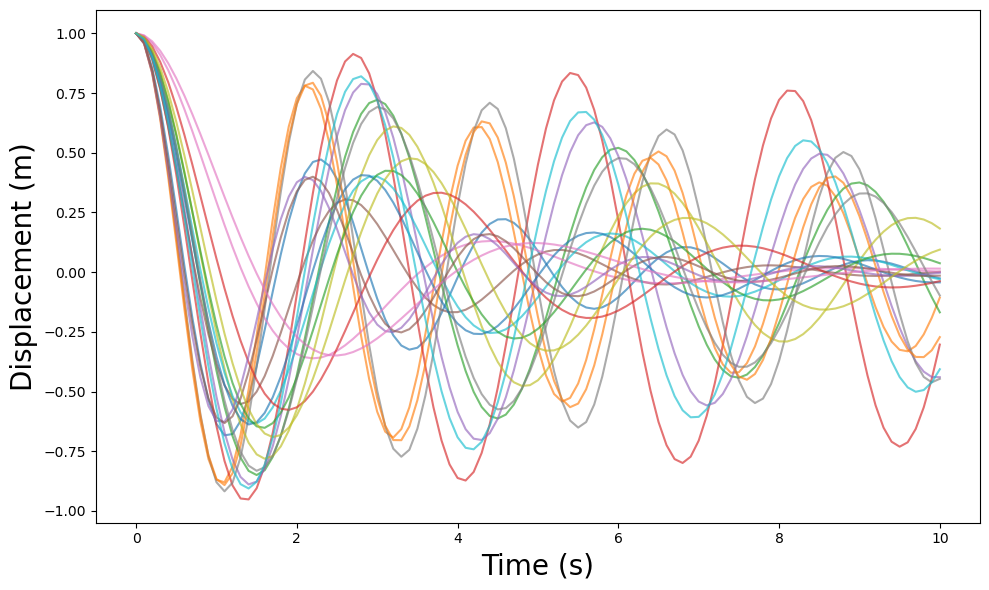

In [19]:
fontsize=20

plt.figure(figsize=(10, 6))
plt.plot(t, x1s[0:20].T, alpha=0.65)  # Plotting with some transparency for better visibility of overlapping lines

plt.xlabel('Time (s)', fontsize=fontsize)  # Label for the x-axis
plt.ylabel('Displacement (m)', fontsize=fontsize)  # Label for the y-axis

plt.tight_layout()  # Adjusting the layout so everything fits without overlapping
plt.savefig('time_series_dp')
plt.show()


In [8]:
np.save('damped_pendulum_data.npy', x1s)

In [9]:
np.savetxt('damped_pendulum_data_params.dat', np.c_[act_kappas, act_betas])

In [10]:
np.save('damped_pendulum_data_train.npy', x1s[0:14000])
np.save('damped_pendulum_data_valid.npy', x1s[14000:18000])
np.save('damped_pendulum_data_test.npy', x1s[18000:])

np.savetxt('damped_pendulum_data_params_train.dat', np.c_[act_kappas[0:14000], act_betas[0:14000]])
np.savetxt('damped_pendulum_data_params_valid.dat', np.c_[act_kappas[14000:18000], act_betas[14000:18000]])
np.savetxt('damped_pendulum_data_params_test.dat', np.c_[act_kappas[18000:], act_betas[18000:]])

## extra data for variational autoencoder with question

In [11]:
def analytic_sol(t, kappa, beta):
    omega = np.sqrt(kappa)*np.sqrt(1-beta**2/(4*kappa))
    return np.exp(-beta*t/2)*np.cos(omega*t)

In [12]:
kappas_tr = act_kappas[0:14000]
betas_tr = act_betas[0:14000]


kappas_va = act_kappas[14000:18000]
betas_va = act_betas[14000:18000]


kappas_te = act_kappas[18000:]
betas_te = act_betas[18000:]

In [13]:
x_train = x1s[0:14000]
x_val = x1s[14000:18000]
x_test = x1s[18000:]

In [14]:
max_time=20
rtimes_tr = max_time*np.random.rand(len(x_train))
answers_tr =  analytic_sol(rtimes_tr, kappas_tr, betas_tr)

rtimes_va = max_time*np.random.rand(len(x_val))
answers_va =  analytic_sol(rtimes_va, kappas_va, betas_va)

rtimes_te = max_time*np.random.rand(len(x_test))
answers_te =  analytic_sol(rtimes_te, kappas_te, betas_te)


rtimes_tr=rtimes_tr[np.newaxis, :]
rtimes_va=rtimes_va[np.newaxis, :]
rtimes_te=rtimes_te[np.newaxis, :]

answers_tr=answers_tr[np.newaxis, :]
answers_va=answers_va[np.newaxis, :]
answers_te=answers_te[np.newaxis, :]

In [15]:
np.save('rtimes_tr.npy', rtimes_tr)
np.save('rtimes_va.npy', rtimes_va)
np.save('rtimes_te.npy', rtimes_te)

np.save('answers_tr.npy', answers_tr)
np.save('answers_va.npy', answers_va)
np.save('answers_te.npy', answers_te)

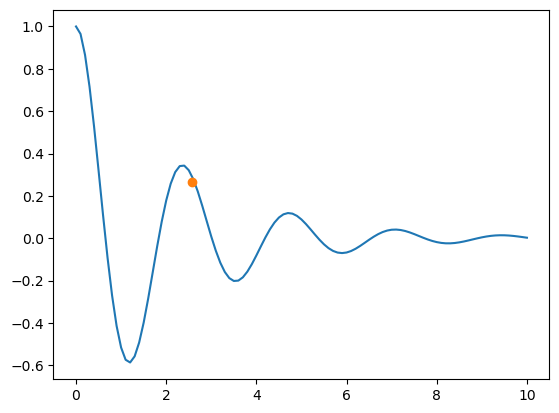

In [21]:
plt.plot(t, x_train[2])
plt.plot(rtimes_tr[0, 2], answers_tr[0, 2], 'o')

In [20]:
rtimes_tr[0, 0:10]

array([ 5.15654097, 18.11629432,  2.56645748, 16.70401199,  2.76511386,
       15.51683714, 13.3574874 ,  2.18572164,  1.18418836,  7.80323646])